# EVENT PLOTS -- Run 3883 Co-56

#### Cutoff near 1500 keV, trying to find double escape peak at 1550 keV and single peak at 1770 keV

In [1]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2017-05-04 02:36:47


In [2]:
%gui qt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
import os
import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from invisible_cities.database import load_db
import invisible_cities.reco.peak_functions_c as cpf

In [5]:
import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.reco.wfm_functions as wfm
import invisible_cities.sierpe.blr as blr
import invisible_cities.reco.peak_functions_c as cpf
from invisible_cities.core.mpl_functions import set_plot_labels
from invisible_cities.reco.params import S12Params, ThresholdParams
from   invisible_cities.core.system_of_units_c import units
import   invisible_cities.core.mpl_functions as mpl

In [6]:
from icaro.core.gui_functions import fplot_pmt_waveforms, fplot_pmt_signals_vs_time_mus, fplot_signal_vs_time_mus,\
                           fplot_s12, hist_1d, fplot_s2si_map, fill_col_vector, add_simap, fplot_map

In [7]:
from icaro.core.event_pmaps import EventPmaps, print_s12, print_s2si

In [8]:
run_number = 3883
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values
pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist()

In [9]:
channel_id = DataPMT.ChannelID.values
coeff_blr = abs(DataPMT.coeff_blr.values)
coeff_c = abs(DataPMT.coeff_c .values)
adc_to_pes = abs(DataPMT.adc_to_pes.values)
adc_to_pes_sipm = abs(DataSiPM.adc_to_pes.values)

In [10]:
filename = '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3882/dst_waves.gdcsnext.000_3882.root.h5'

In [11]:
h5rwf = tb.open_file(filename, "r") 

In [12]:
pmtrwf, pmtblr, sipmrwf = tbl.get_vectors(h5rwf)

In [13]:
NEVT, NPMT, PMTWL = pmtrwf.shape
NEVT, NSIPM, SIPMWL = sipmrwf.shape
print("""
            Number of events in file = {}
            Number of PMTs = {}
            PMTWL = {}
            Number of SiPMs = {}
            SiPMWL = {}
              """.format(NEVT, NPMT, PMTWL,NSIPM, SIPMWL))


            Number of events in file = 168
            Number of PMTs = 12
            PMTWL = 52000
            Number of SiPMs = 1792
            SiPMWL = 1300
              


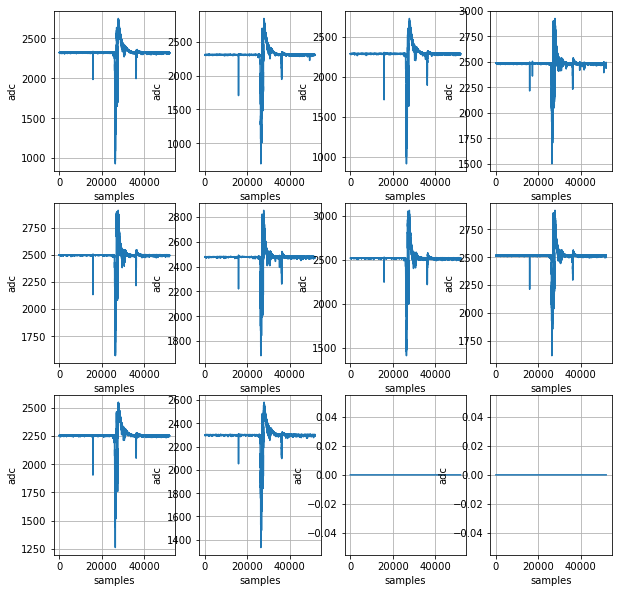

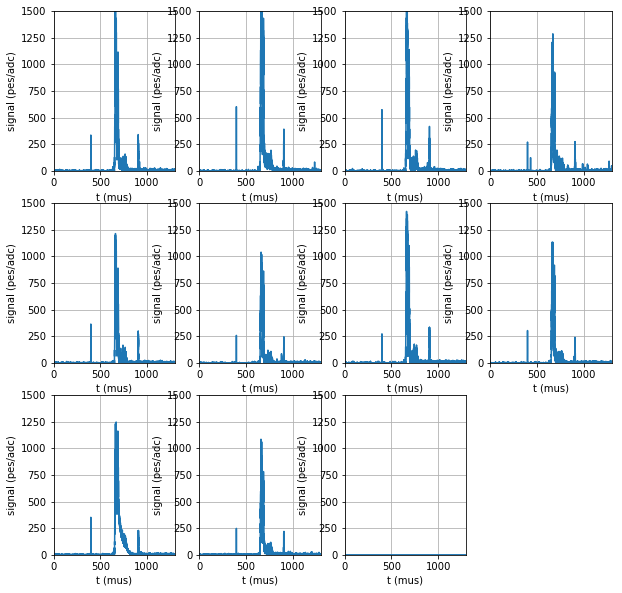

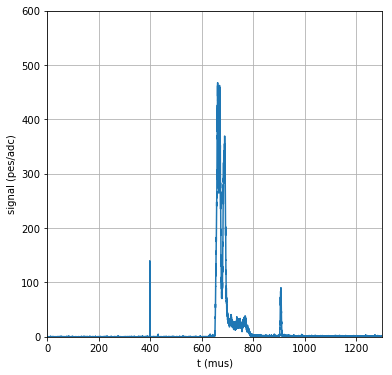

In [14]:
event=1
RWF = pmtrwf[event]
mpl.plot_pmt_waveforms(RWF, zoom=False, window_size=800, figsize=(10,10))
CWF = blr.deconv_pmt(RWF,
                     coeff_c,
                     coeff_blr,
                     pmt_active,
                     n_baseline  = 48000,
                    thr_trigger = 5)
mpl.plot_pmt_signals_vs_time_mus(CWF,
                         pmt_active,
                         t_min      =    0,
                         t_max      = 1300,
                         signal_min =    0,
                         signal_max =  1500,
                         figsize=(10,10))
csum, csum_mau = cpf.calibrated_pmt_sum(CWF,
                                        adc_to_pes,
                                        pmt_active = pmt_active,
                                        n_MAU      = 100,
                                        thr_MAU    = 3)
mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 0,
                        t_max      = 1300,
                        signal_min =    0,
                        signal_max =  600,
                        figsize=(6,6))

In [15]:
event=0

In [16]:
RWF = pmtrwf[event]

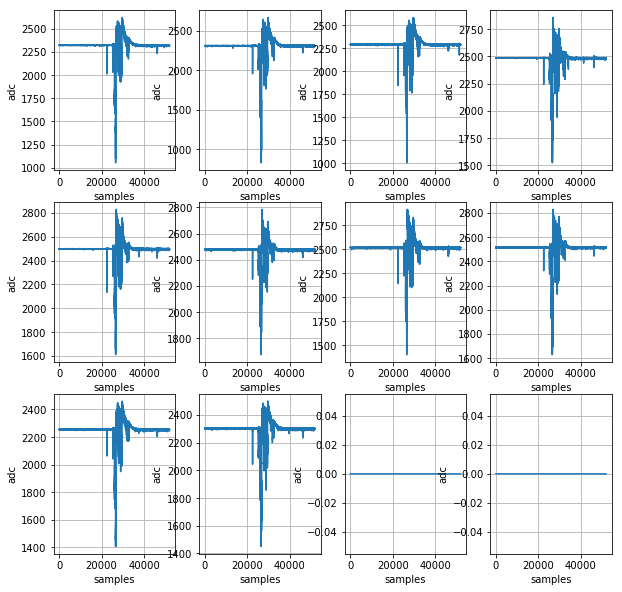

In [17]:
mpl.plot_pmt_waveforms(RWF, zoom=False, window_size=800, figsize=(10,10))

In [18]:
CWF = blr.deconv_pmt(RWF,
                     coeff_c,
                     coeff_blr,
                     pmt_active,
                     n_baseline  = 48000,
                    thr_trigger = 5)

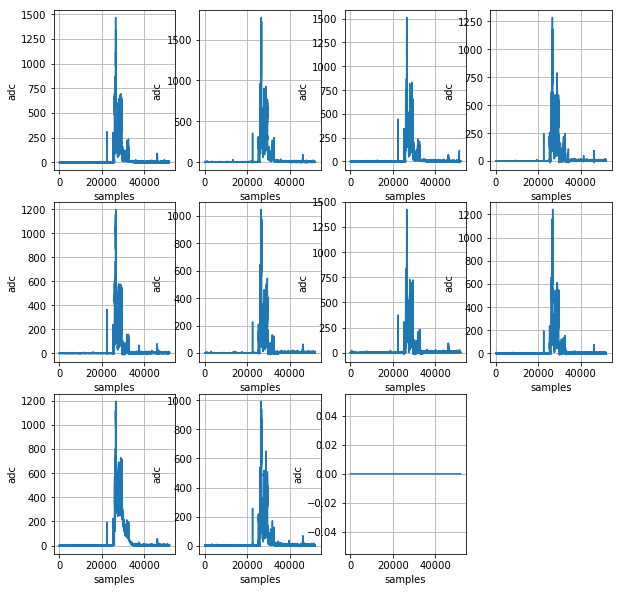

In [19]:
mpl.plot_pmt_waveforms(CWF, zoom=False, window_size=800, figsize=(10,10))

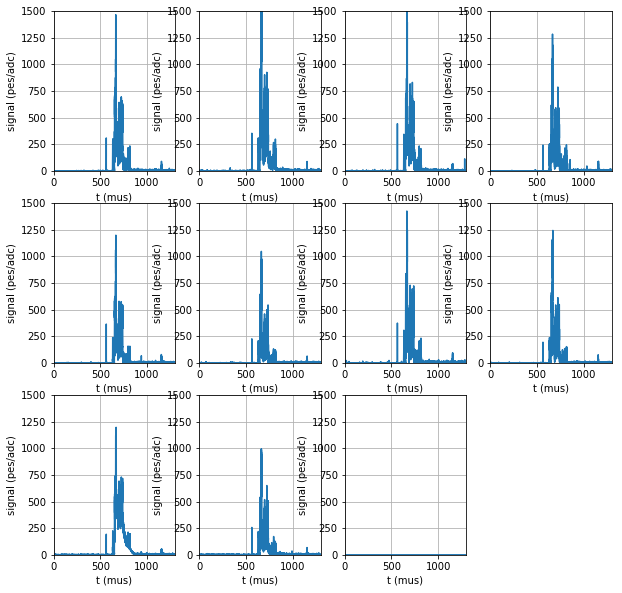

In [20]:
mpl.plot_pmt_signals_vs_time_mus(CWF,
                         pmt_active,
                         t_min      =    0,
                         t_max      = 1300,
                         signal_min =    0,
                         signal_max =  1500,
                         figsize=(10,10))

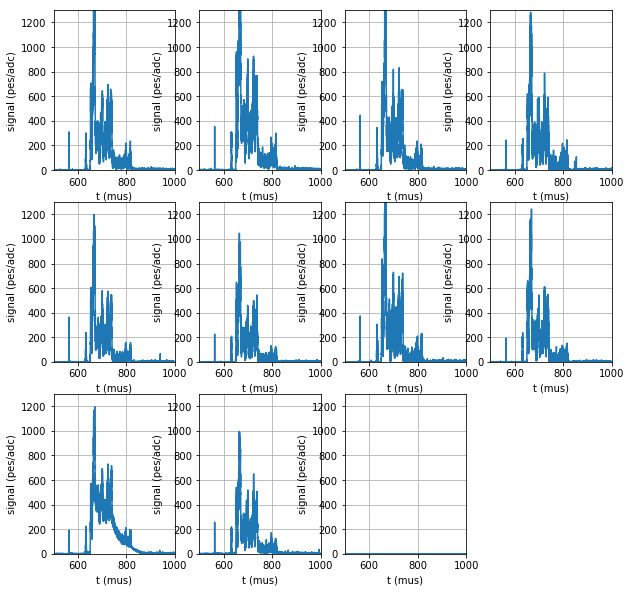

In [21]:
mpl.plot_pmt_signals_vs_time_mus(CWF,
                         pmt_active,
                         t_min      =    500,
                         t_max      = 1000,
                         signal_min =    0,
                         signal_max =  1300,
                         figsize=(10,10))

In [22]:
csum, csum_mau = cpf.calibrated_pmt_sum(CWF,
                                        adc_to_pes,
                                        pmt_active = pmt_active,
                                        n_MAU      = 100,
                                        thr_MAU    = 3)

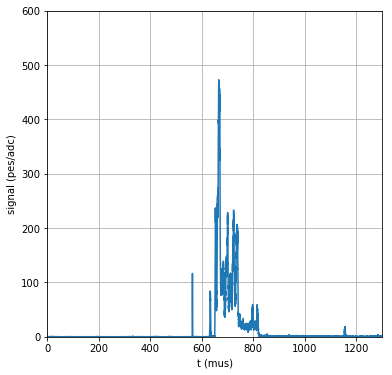

In [23]:
mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 0,
                        t_max      = 1300,
                        signal_min =    0,
                        signal_max =  600,
                        figsize=(6,6))

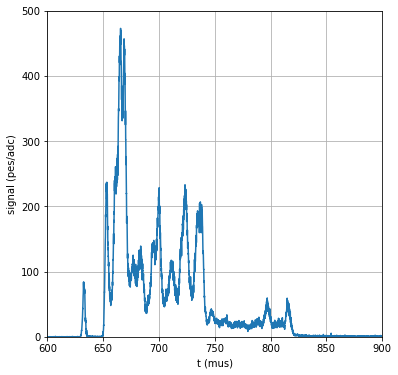

In [24]:
mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 600,
                        t_max      = 900,
                        signal_min =    0,
                        signal_max =  500,
                        figsize=(6,6))

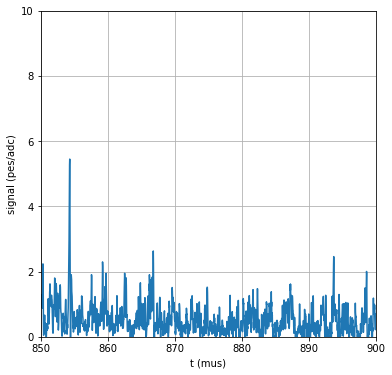

In [25]:
mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 850,
                        t_max      = 900,
                        signal_min =    0,
                        signal_max =  10,
                        figsize=(6,6))

In [26]:
def plot_event(event):
    RWF = pmtrwf[event]
    mpl.plot_pmt_waveforms(RWF, zoom=False, window_size=800, figsize=(10,10))
    CWF = blr.deconv_pmt(RWF,
                     coeff_c,
                     coeff_blr,
                     pmt_active,
                     n_baseline  = 48000,
                    thr_trigger = 5)
    mpl.plot_pmt_signals_vs_time_mus(CWF,
                         pmt_active,
                         t_min      =    0,
                         t_max      = 1300,
                         signal_min =    0,
                         signal_max =  1500,
                         figsize=(10,10))
    csum, csum_mau = cpf.calibrated_pmt_sum(CWF,
                                        adc_to_pes,
                                        pmt_active = pmt_active,
                                        n_MAU      = 100,
                                        thr_MAU    = 3)
    mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 0,
                        t_max      = 1300,
                        signal_min =    0,
                        signal_max =  600,
                        figsize=(6,6))
    
    return csum


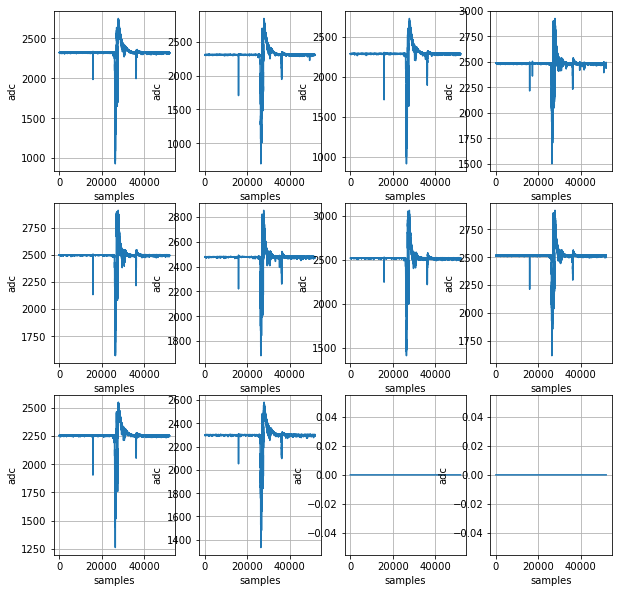

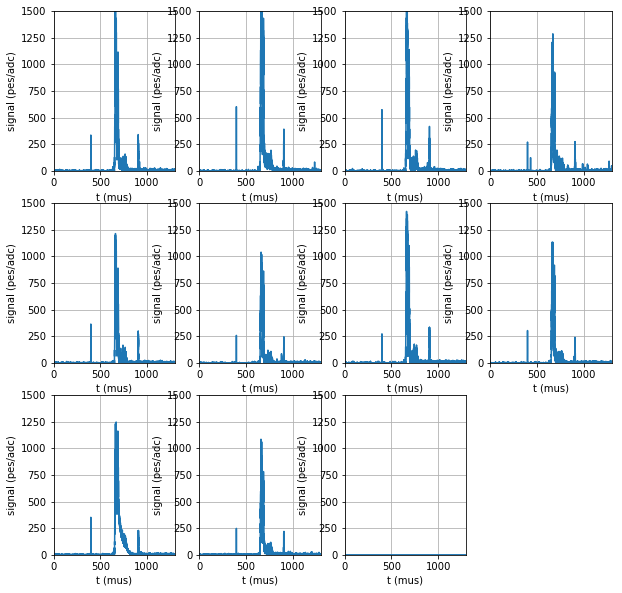

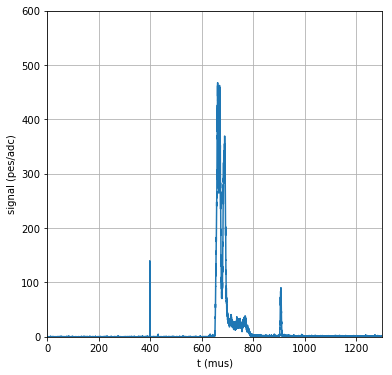

In [27]:
csum = plot_event(event=1)

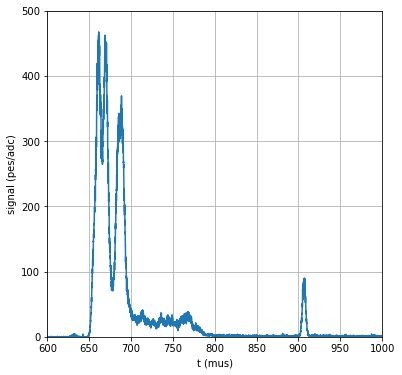

In [28]:
mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 600,
                        t_max      = 1000,
                        signal_min =    0,
                        signal_max =  500,
                        figsize=(6,6))



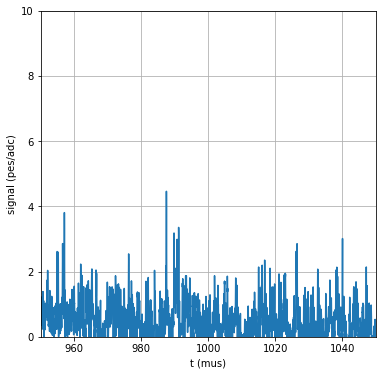

In [29]:
mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 950,
                        t_max      = 1050,
                        signal_min =    0,
                        signal_max =  10,
                        figsize=(6,6))



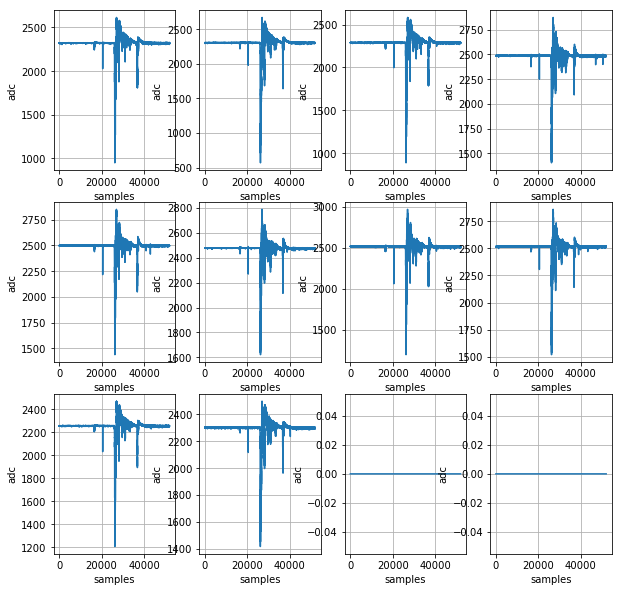

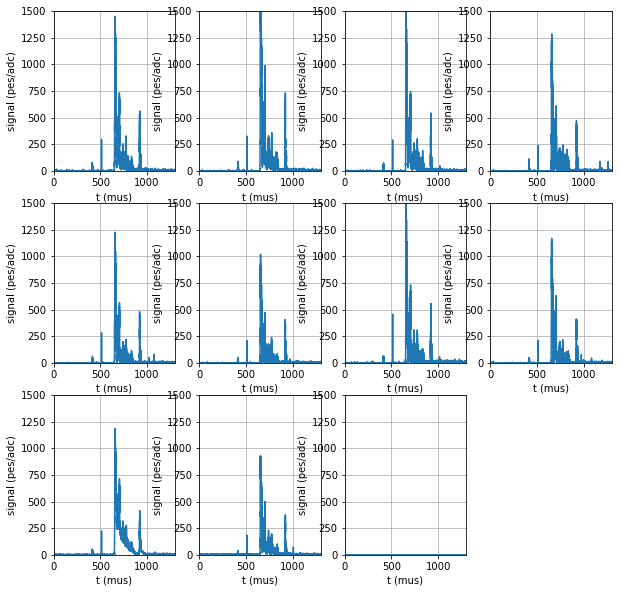

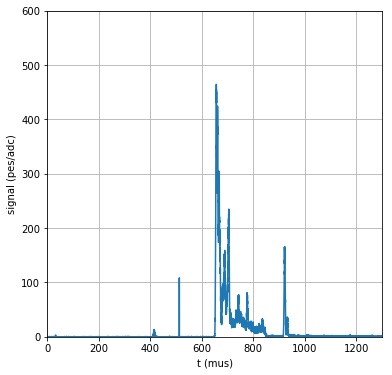

In [30]:
csum = plot_event(event=2)

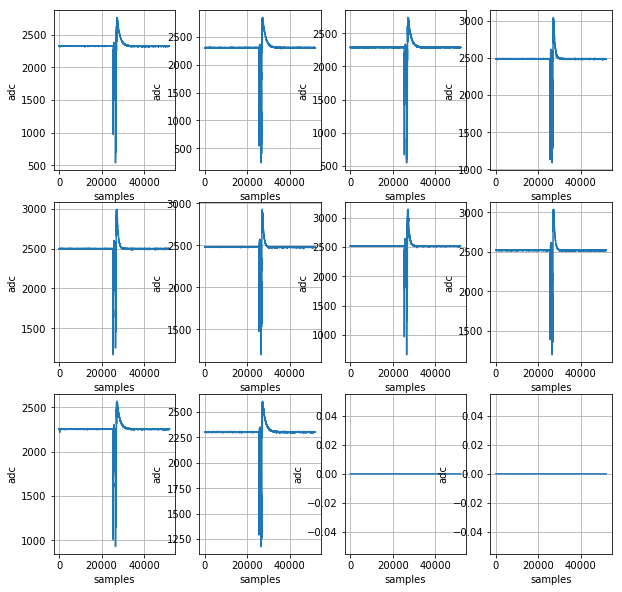

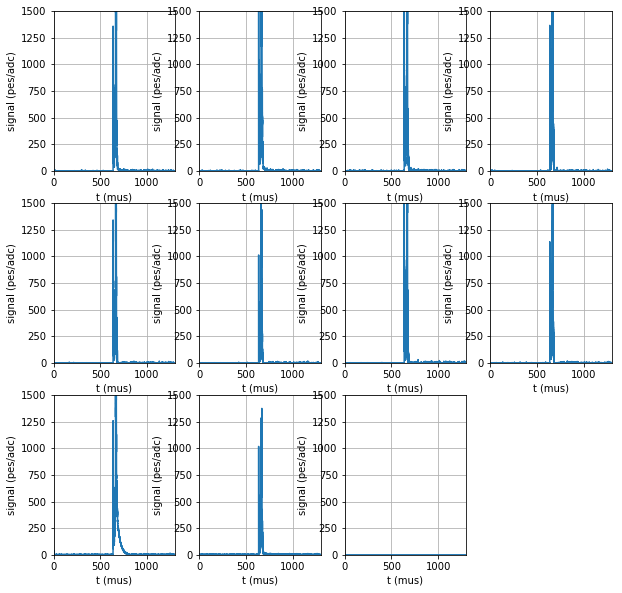

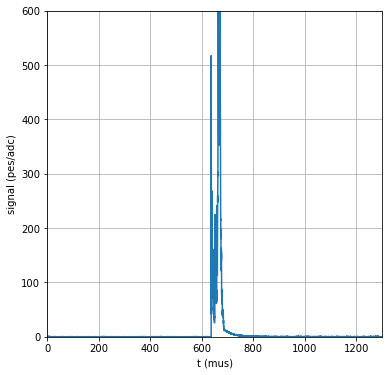

In [31]:
csum = plot_event(event=3)

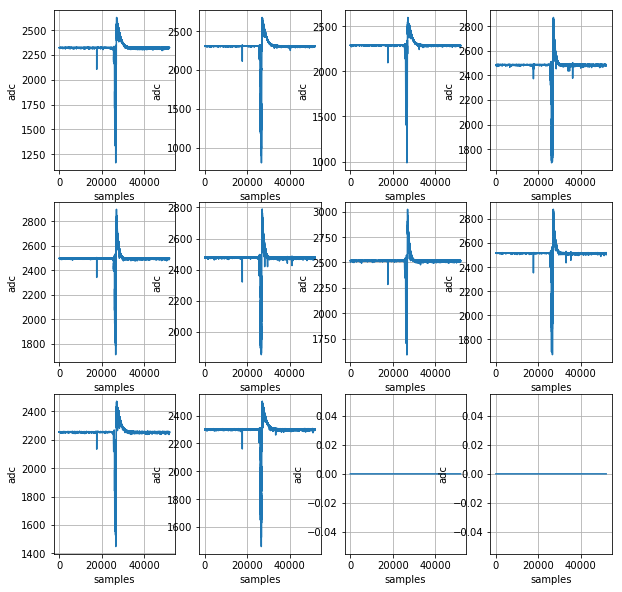

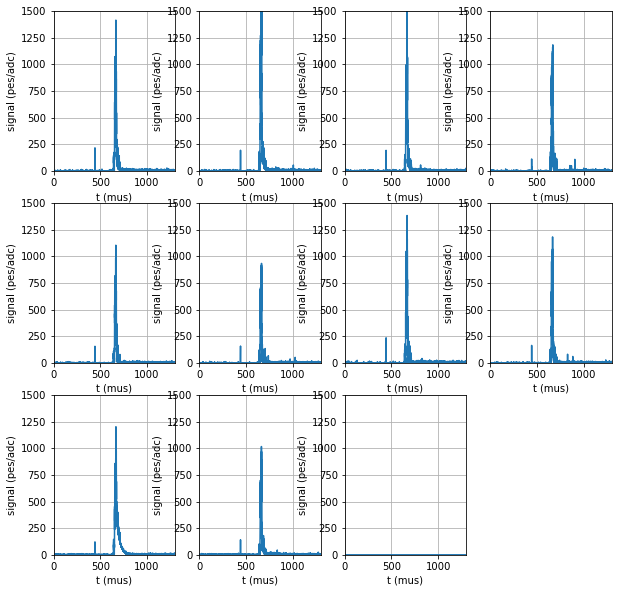

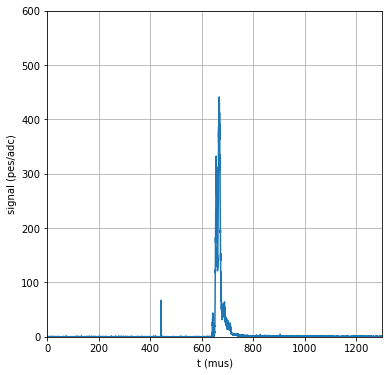

In [ ]:
csum = plot_event(event=4)

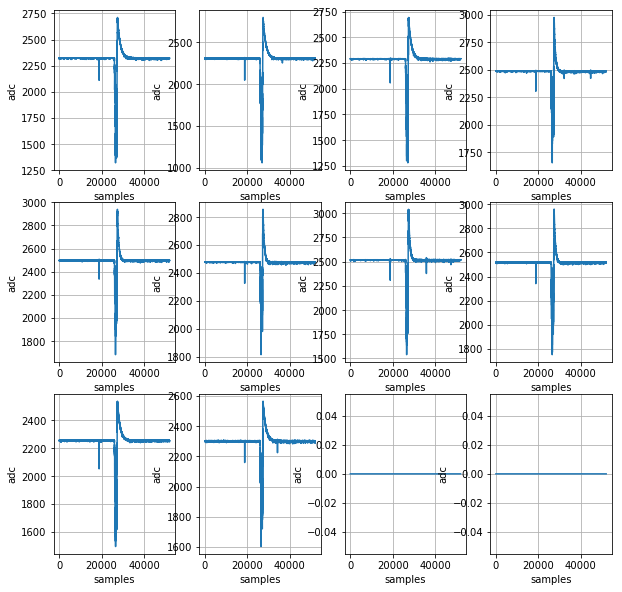

In [ ]:
csum = plot_event(event=5)

In [ ]:
csum = plot_event(event=6)

In [ ]:
csum = plot_event(event=7)

In [ ]:
csum = plot_event(event=8)

In [ ]:
csum = plot_event(event=9)